# Project Description
In this project, we will be trying to predict the monthly sales for a bakery company using Statistical Models in Python. <br/>
We will start with Baseline models (Historic mean, Naive Forecast, Seasonal Naive), which are based on simple heuristics of statistics.

# Tools Required
<ul>
  <li>Python 3.12 or greater</li>
  <li>An IDE <i>(e.g VS Code, PyCharm, Spyder, Jupyter Notebook, Google Colab)</i></li>
</ul>

# Prerequisites
<ul>
  <li>Knowledge of Basic Statistics</li>
  <li>Knowledge of Python Programming</li>
  <li>Knowledge of basic forecasting concepts</li>
</ul>

<hr>

<h1 style="text-align: center;">Dependencies</h1>
<br>
Run the cell below to install the required dependencies for the project

In [ ]:
!pip install statsforecast utilsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.6/354.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.5/280.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
!git clone https://github.com/marcopeix/youtube_tutorials.git

Cloning into 'youtube_tutorials'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 1.57 MiB | 9.59 MiB/s, done.
Resolving deltas: 100% (6/6), done.


<h1 style="text-align: center;">Libraries</h1>
<br>
Run the cell below to install the required libraries for the project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *
from utilsforecast.feature_engineering import fourier, time_features, pipeline
from functools import partial

from statsforecast import StatsForecast
from statsforecast.models import Naive, HistoricAverage, WindowAverage, SeasonalNaive
from statsforecast.models import AutoARIMA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
""" Loading the data """
df = pd.read_csv('youtube_tutorials/data/daily_sales_french_bakery.csv', parse_dates=['ds'])
df.head()

,unique_id,ds,y,unit_price
0,12 MACARON,2022-07-13,10.0,10.0
1,12 MACARON,2022-07-14,0.0,10.0
2,12 MACARON,2022-07-15,0.0,10.0
3,12 MACARON,2022-07-16,10.0,10.0
4,12 MACARON,2022-07-17,30.0,10.0


In [ ]:
""" Data Profiling & Exploration """
print(f'Total nulls in each column:\n {df.isnull().sum()}')
print()
print(f'Dimensions: {df.shape}')
print()
print(f'Total count of duplicates: {df.duplicated().sum()}')

Total nulls in each column:
 unique_id     0
ds            0
y             0
unit_price    0
dtype: int64

Dimensions: (57046, 4)

Total count of duplicates: 0


In [ ]:
""" Data Preprocessing """
grp_df = df.groupby('unique_id').filter(lambda x: len(x) >= 28)
grp_df = grp_df.drop(['unit_price'], axis=1)
grp_df.head()

,unique_id,ds,y
0,12 MACARON,2022-07-13,10.0
1,12 MACARON,2022-07-14,0.0
2,12 MACARON,2022-07-15,0.0
3,12 MACARON,2022-07-16,10.0
4,12 MACARON,2022-07-17,30.0


Text(0.5, 1.0, 'Top 20 products sold by the bakery')

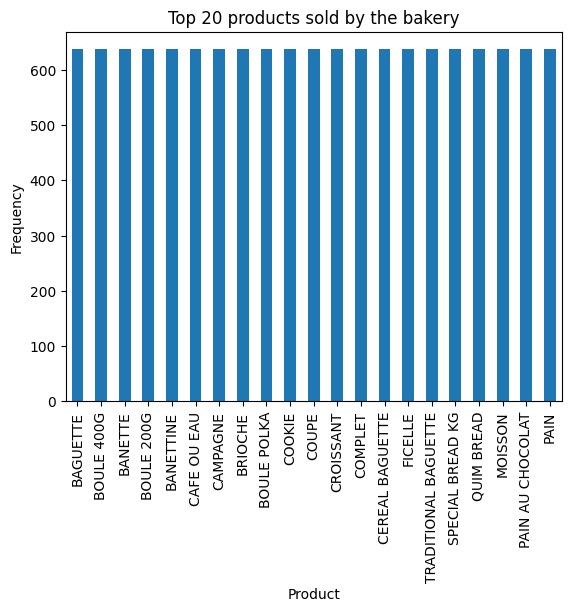

In [ ]:
""" Top 20 products sold by the bakery """
grp_df['unique_id'].value_counts()[:21].plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 20 products sold by the bakery')

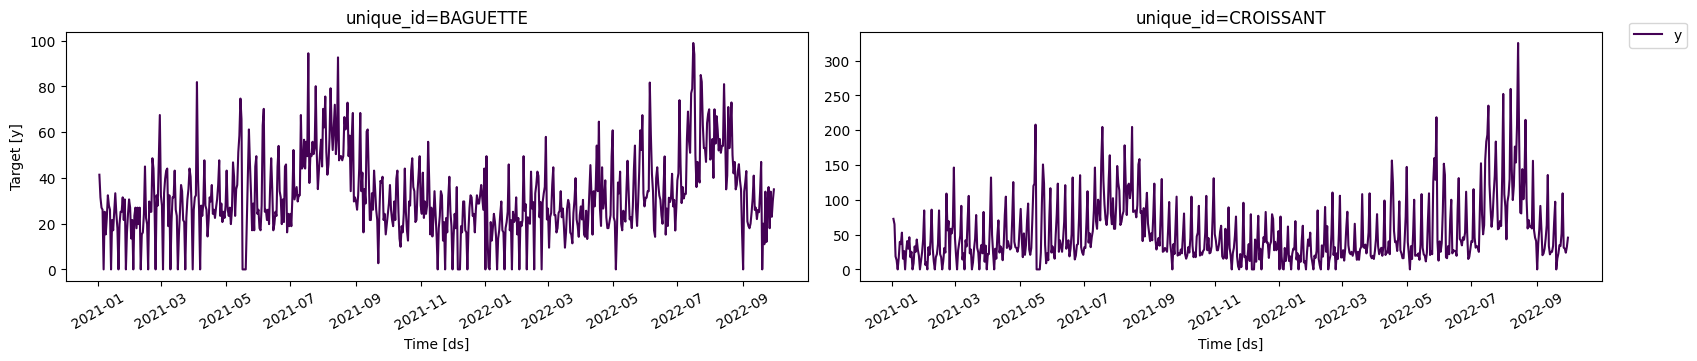

In [ ]:
""" Plot the daily sales for the top 2 products sold by the bakery """
plot_series(
    df=grp_df,
    ids=['BAGUETTE', 'CROISSANT'],
    palette='viridis'
)

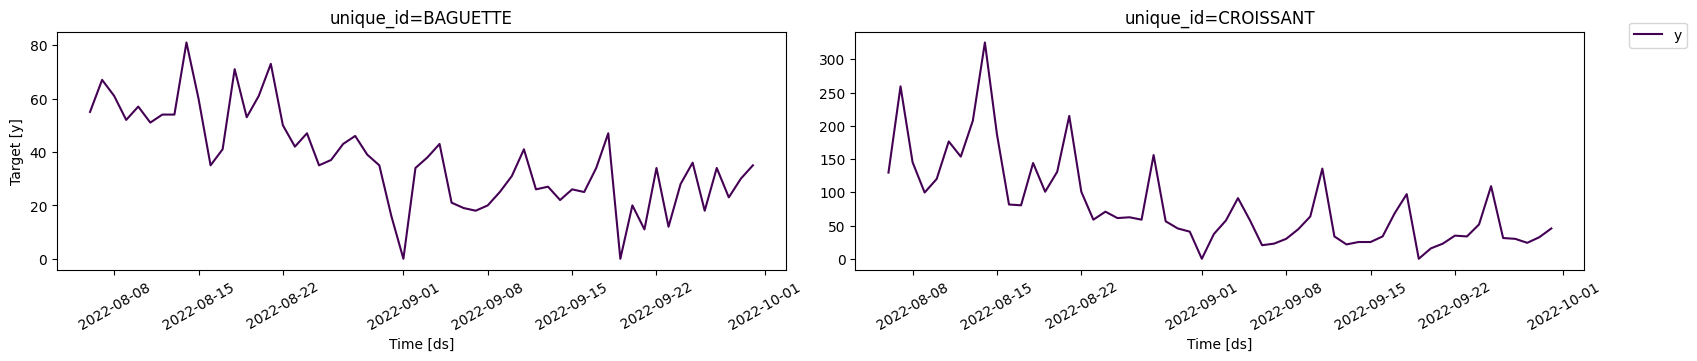

In [ ]:
""" Plot the daily sales for the top 2 products sold by the bakery, but limit to 56 days """
plot_series(
    df=grp_df,
    ids=['BAGUETTE', 'CROISSANT'],
    max_insample_length=56,
    palette='viridis'
)

# Baseline Models
The cells below will setup the very simple models to try and predict the sales for the next 7 days.

In [ ]:
forecast_horizon = 7
window_size = 7
season_length = 7

models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=window_size),
    SeasonalNaive(season_length=season_length)
]

sf = StatsForecast(
    models=models,
    freq='D'
)

sf.fit(df=grp_df)
y_pred = sf.predict(h=forecast_horizon)

""" Look at the predictions """
y_pred.head()

,unique_id,ds,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,12 MACARON,2022-09-29,10.0,8.974359,2.857143,0.0
1,12 MACARON,2022-09-30,10.0,8.974359,2.857143,0.0
2,12 MACARON,2022-10-01,10.0,8.974359,2.857143,10.0
3,12 MACARON,2022-10-02,10.0,8.974359,2.857143,0.0
4,12 MACARON,2022-10-03,10.0,8.974359,2.857143,0.0


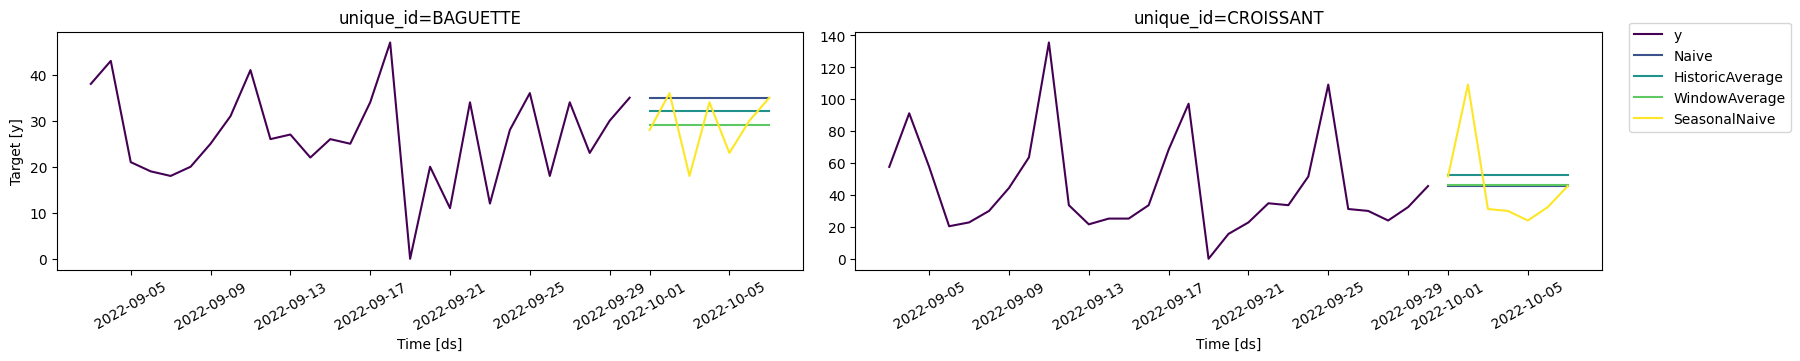

In [ ]:
""" Plot the predictions against the true labels """
plot_series(
    df = grp_df,
    forecasts_df=y_pred,
    ids = ['BAGUETTE', 'CROISSANT'],
    max_insample_length=28,
    palette='viridis'
)

# Evaluating the baseline models
Now we will begin to evaluate the baseline models by splitting the dataset into train and test sets. The idea is that the train will be used to train the model and the model will try and generate predictions based on what it has learnt. Then, those predictions will then be evaluated against the test set to see if the model is performing good or bad.

In [ ]:
""" We will define the test set to be the last 7 days of the dataset """
test = grp_df.groupby('unique_id').tail(7)
train = grp_df.drop(test.index).reset_index()

In [ ]:
""" Train the models """
sf.fit(df=train)
y_pred = sf.predict(h=forecast_horizon)

""" Build an evaluation dataframe """
eval_df = pd.merge(test, y_pred, how='left', on=['ds', 'unique_id'])

In [ ]:
""" To evaluate the models, we will use the MAE and MAPE. """
evaluation = evaluate(
    eval_df,
    metrics=[mae, mape]
)

evaluation.head()

,unique_id,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,12 MACARON,mae,2.857143,6.961771,3.469388,4.285714
1,BAGUETTE,mae,17.142857,5.455193,7.877551,12.571429
2,BAGUETTE APERO,mae,0.000000,0.537572,0.642857,0.642857
3,BAGUETTE GRAINE,mae,9.800000,4.612271,2.942857,0.200000
4,BANETTE,mae,1.314286,5.421984,6.008163,7.885714


It might be a good idea to smooth out the metrics used for each product to get a clear picture of how each model is performing across all the products is performing.

In [ ]:
new_evaluation = evaluation.drop(
    ['unique_id'],
    axis=1
).groupby('metric').mean().reset_index()

new_evaluation.head()

,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,mae,6.107556,5.228439,5.011663,4.613636
1,mape,0.800702,0.639290,0.692288,0.804399


Plot a bar graph that shows the different metrics.

In [ ]:
x_values = new_evaluation.columns[1:].to_list()
y_values = new_evaluation.iloc[0, 1:]

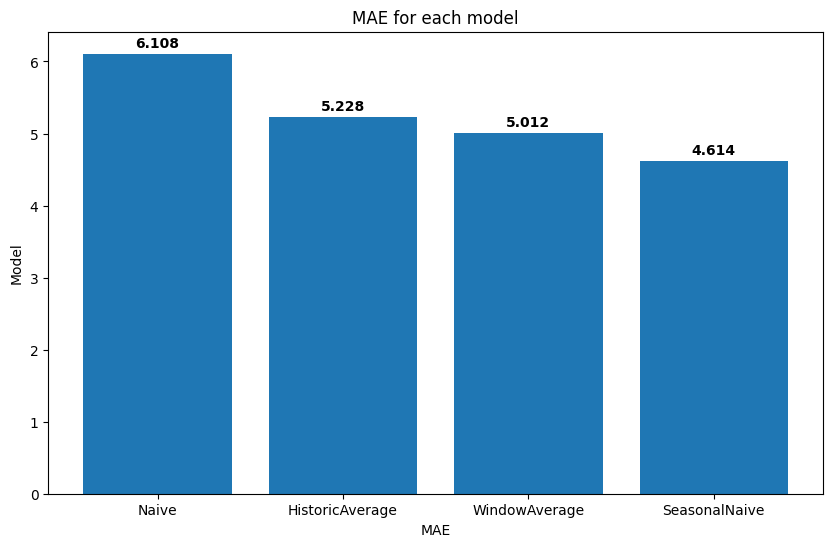

In [ ]:
plt.figure(
    figsize=(10, 6)
)

bars = plt.bar(x_values, y_values)

for bar, val in zip(bars, y_values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{val:.3f}',
        ha='center',
        va='bottom',
        fontweight='bold'
)

plt.title('MAE for each model')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.show()

# ARIMA
What is ARIMA?
<ul>
  <li>
    <strong>ARIMA</strong> stands for Autoregressive Integrated Moving Average.
  </li>
  <li>
    Used for time series analysis and forecasting
  </li>
</ul> <br>

<h3>Three components of ARIMA</h3>
<ul>
  <li><i>Autoregressive component (p): </i>
        This component uses past values to predict the future values
  </li>

  <li>
        <i>Integrated (d): </i> This component is used to make the time series data stationary.
  </li>

  <li>
        <i>Moving Average (q): </i> This component accounts for the relationship between an observation and the residual errors from past predictions.
  </li>
</ul>

In [ ]:
""" Separate out a few time series observations to train because SARIMA is computationally expensive. """
unique_ids = ['BAGUETTE', 'CROISSANT']
small_train = train[train['unique_id'].isin(unique_ids)]
small_test = test[test['unique_id'].isin(unique_ids)]
small_train = small_train.drop(columns=['index'], errors='ignore')
small_test = small_test.drop(columns=['index'], errors='ignore')

In [ ]:
""" Model training """
models = [
    AutoARIMA(seasonal=False, alias='ARIMA'),
    AutoARIMA(season_length=season_length, alias='SARIMA')
]

sf = StatsForecast(
    models=models,
    freq='D'
)

sf.fit(df=small_train)
arima_preds = sf.predict(h=forecast_horizon)

In [ ]:
""" Model evaluation """
arima_eval_df = pd.merge(
    arima_preds,
    eval_df,
    how='inner',
    on=['ds', 'unique_id']
)

arima_eval = evaluate(
    arima_eval_df,
    metrics=[mae, mape]
)
arima_eval.head()

,unique_id,metric,ARIMA,SARIMA,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,BAGUETTE,mae,9.353153,7.449083,17.142857,5.455193,7.877551,12.571429
1,CROISSANT,mae,14.565395,10.359143,17.485714,22.618934,18.244898,12.857143
2,BAGUETTE,mape,0.310080,0.242995,0.564842,0.235656,0.254050,0.463403
3,CROISSANT,mape,0.223349,0.226302,0.276895,0.568182,0.343284,0.328958


In [ ]:
new_arima_eval = arima_eval.drop(
    ['unique_id'],
    axis=1
).groupby('metric').mean().reset_index()

new_arima_eval.head()

,metric,ARIMA,SARIMA,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,mae,11.959274,8.904113,17.314286,14.037063,13.061224,12.714286
1,mape,0.266715,0.234648,0.420868,0.401919,0.298667,0.396180


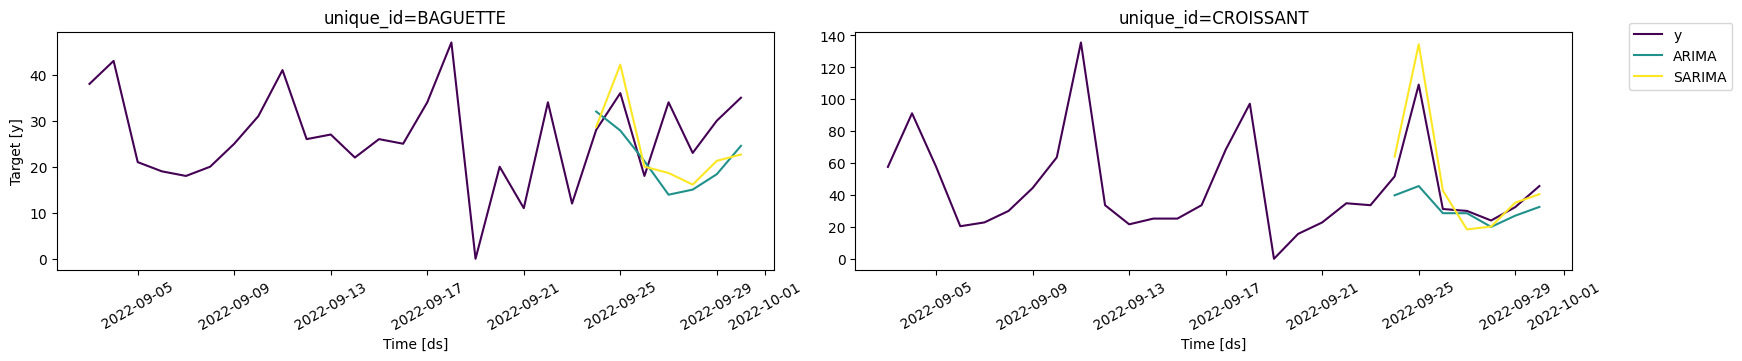

In [ ]:
plot_series(
    df=grp_df,
    forecasts_df=arima_preds,
    ids=['BAGUETTE', 'CROISSANT'],
    max_insample_length=28,
    palette='viridis'
)

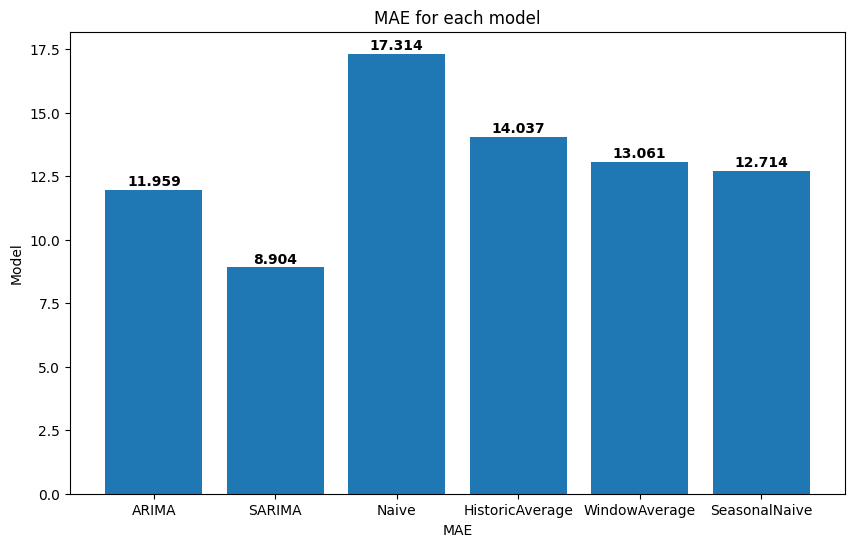

In [ ]:
x_values = new_arima_eval.columns[1:].to_list()
y_values = new_arima_eval.iloc[0, 1:]

plt.figure(
    figsize=(10, 6)
)

bars = plt.bar(x_values, y_values)

for bar, val in zip(bars, y_values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{val:.3f}',
        ha='center',
        va='bottom',
        fontweight='bold'
)

plt.title('MAE for each model')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.show()

# Results & Findings
It comes as no surprise why the SARIMA has the lowest MAE and is the best performing model. This is due to the seasonality present in the dataset. The Naive model is the worst performing model of all 6 models trained. <br>

It is important to mention that these models have been evaluated using the last 7 observations of the dataset, which may not be a good strategy. So it might be a good idea to explore using techniques like <strong>Cross Validation</strong>.
<hr>

# Cross Validation
<h4>What is cross validation?</h4>
Cross validation is a technique to evaluate a model's performance on unseen data.

<h4>Why cross validation?</h4>
<ul>
  <li><strong>Prevents overfitting</strong>: CV performs multiple training-validation cycles so that the model does not "memorise" the training data and produce very good results but struggle to generalize on unseen data. </li>
  <li><strong>Builds a robust model</strong>: Shows how the model performs over the entire series.
  </li>
</ul>

In [ ]:
""" We will be parsing the entire dataset into the cross validation model. """
subset_df = grp_df[grp_df['unique_id'].isin(unique_ids)]

# DEFINE THE MODELS TO TRAIN
models = [
    SeasonalNaive(season_length=season_length),
    AutoARIMA(seasonal=False, alias='ARIMA'),
    AutoARIMA(season_length=season_length, alias='SARIMA')
]

# INIT STATSFORECAST OBJECT
sf = StatsForecast(
    models=models,
    freq='D'
)

# CROSS VALIDATION
cv_df = sf.cross_validation(
    h=forecast_horizon,
    df=subset_df,
    n_windows=8,
    step_size=forecast_horizon, # non-overlapping windows
    refit=True
)

cv_df.head()

,unique_id,ds,cutoff,y,SeasonalNaive,ARIMA,SARIMA
0,BAGUETTE,2022-08-06,2022-08-05,55.0,68.0,71.355196,71.584713
1,BAGUETTE,2022-08-07,2022-08-05,67.0,70.0,70.337980,78.458883
2,BAGUETTE,2022-08-08,2022-08-05,61.0,48.0,61.195004,57.001732
3,BAGUETTE,2022-08-09,2022-08-05,52.0,49.0,52.649013,49.401144
4,BAGUETTE,2022-08-10,2022-08-05,57.0,57.0,47.785876,49.725278


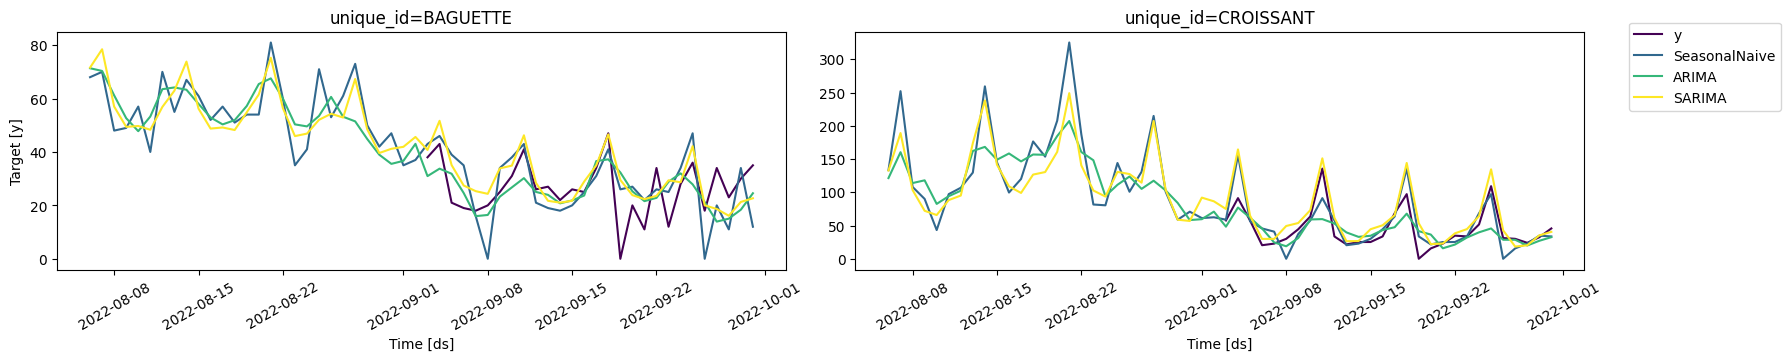

In [ ]:
# PLOTTING
plot_series(
    df=subset_df,
    forecasts_df=cv_df.drop(
        ['y', 'cutoff'],
        axis=1
    ),
    ids=['BAGUETTE', 'CROISSANT'],
    max_insample_length=28,
    palette='viridis'
)

In [ ]:
cv_eval = evaluate(
    cv_df.drop(['cutoff'], axis=1),
    metrics=[mae, mape]
)
cv_eval = cv_eval.drop(
    ['unique_id'],
    axis=1
).groupby('metric').mean().reset_index()

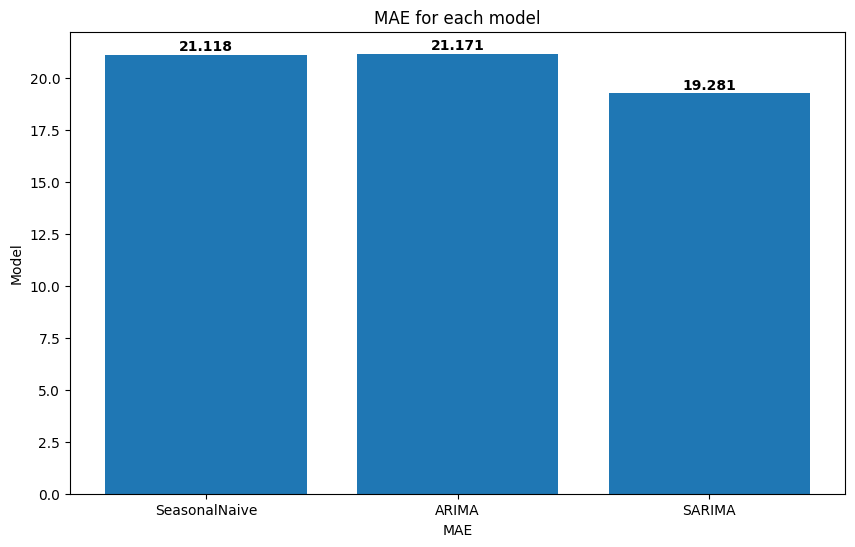

In [ ]:
x_values = cv_eval.columns[1:].to_list()
y_values = cv_eval.iloc[0, 1:]

plt.figure(
    figsize=(10, 6)
)

bars = plt.bar(x_values, y_values)

for bar, val in zip(bars, y_values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'{val:.3f}',
        ha='center',
        va='bottom',
        fontweight='bold'
)

plt.title('MAE for each model')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.show()

# Forecasting With Exogenous Variables
We will use the SARIMA model that incorporates the external predictors. Incorporating exogenous variables can improve the model's performance.
We will first train and test the model without <strong>Cross Validation</strong>. Then, move onto using the technique.

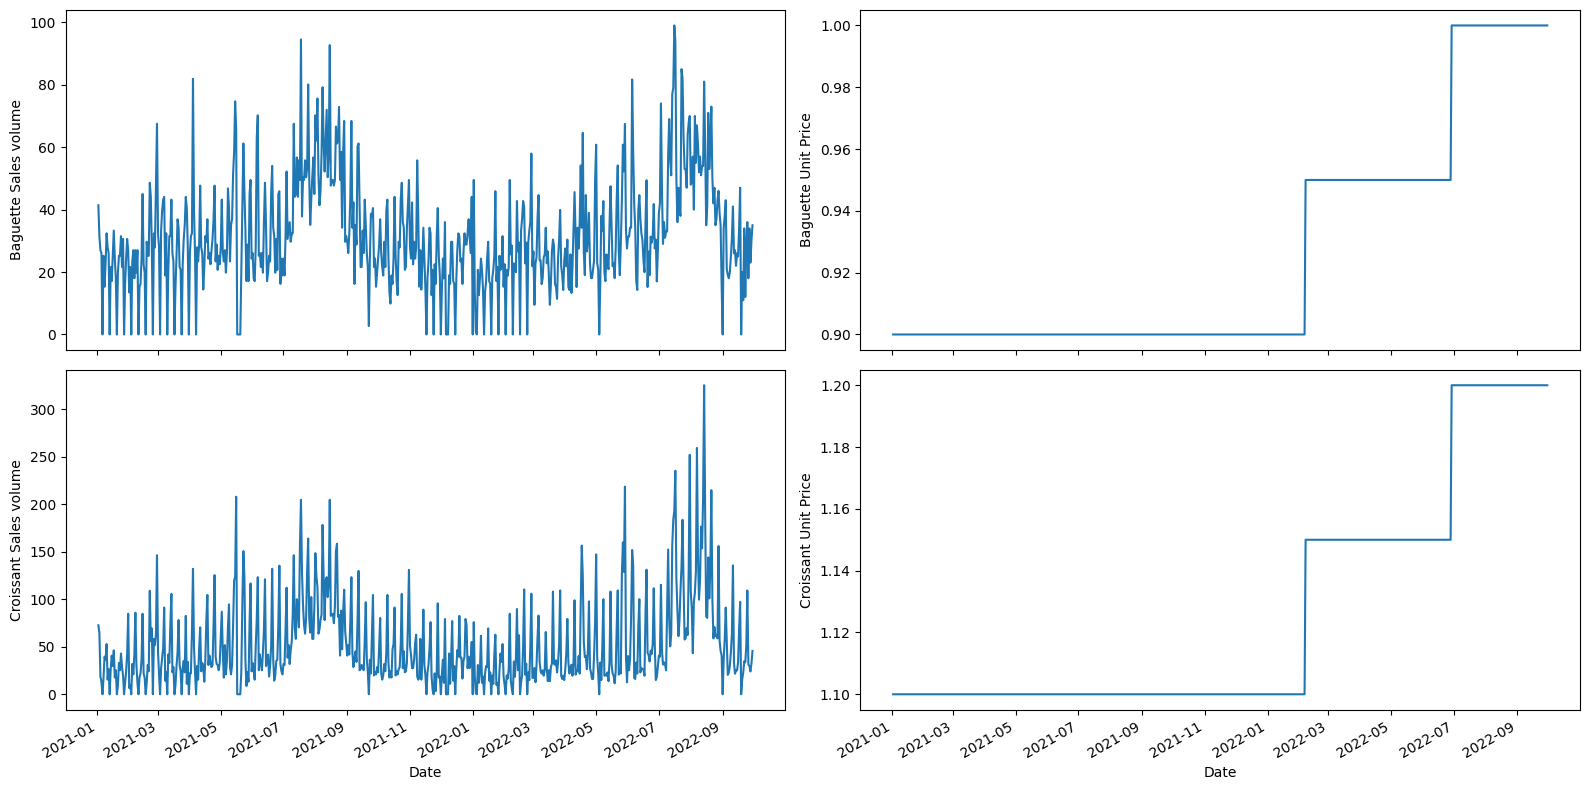

In [ ]:
prod_1 = df[df['unique_id'] == 'BAGUETTE']
prod_2 = df[df['unique_id'] == 'CROISSANT']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(16,8)
)

ax1.plot(prod_1['ds'], prod_1['y'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Baguette Sales volume')

ax2.plot(prod_1['ds'], prod_1['unit_price'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Baguette Unit Price')

ax3.plot(prod_2['ds'], prod_2['y'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Croissant Sales volume')

ax4.plot(prod_2['ds'], prod_2['unit_price'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Croissant Unit Price')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
filtered_df = df[df['unique_id'].isin(unique_ids)]
filtered_df.head()

test_df = filtered_df.groupby('unique_id').tail(7)
train_df = filtered_df.drop(test_df.index).reset_index(drop=True)

In [ ]:
future_exog_df = test_df.drop(['y'], axis=1)
future_exog_df.head()

,unique_id,ds,unit_price
714,BAGUETTE,2022-09-24,1.0
715,BAGUETTE,2022-09-25,1.0
716,BAGUETTE,2022-09-26,1.0
717,BAGUETTE,2022-09-27,1.0
718,BAGUETTE,2022-09-28,1.0


In [ ]:
""" SARIMA with exogenous variables """
models = [
    AutoARIMA(season_length=7,
              alias='SARIMA_exog'
              )
]
sf = StatsForecast(
    models=models,
    freq='D'
)
sf.fit(df=train_df)

sarima_exog_preds = sf.predict(
    h=forecast_horizon,
    X_df=future_exog_df
)

In [ ]:
sarima_test_df = test_df.merge(
    sarima_exog_preds,
    on=['unique_id', 'ds'],
    how='left'
).merge(
    arima_preds[['SARIMA', 'unique_id', 'ds']],
    on=['unique_id', 'ds'],
    how='left'
)
sarima_test_df.head()

,unique_id,ds,y,unit_price,SARIMA_exog,SARIMA
0,BAGUETTE,2022-09-24,28.0,1.0,28.898898,28.657114
1,BAGUETTE,2022-09-25,36.0,1.0,42.513264,42.182373
2,BAGUETTE,2022-09-26,18.0,1.0,20.423976,20.013652
3,BAGUETTE,2022-09-27,34.0,1.0,19.066264,18.646490
4,BAGUETTE,2022-09-28,23.0,1.0,16.468885,16.114925


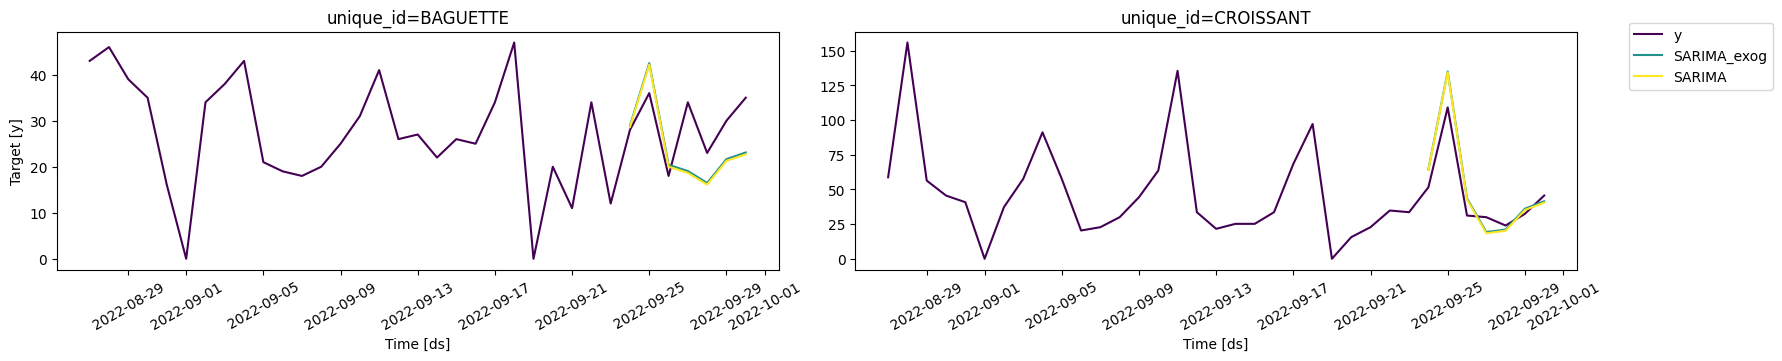

In [ ]:
""" Plot the results for the SARIMA with exog and without exog """

plot_series(
    df=train_df,
    forecasts_df=sarima_test_df,
    ids=['BAGUETTE', 'CROISSANT'],
    max_insample_length=28,
    models=['SARIMA_exog', 'SARIMA'],
    palette='viridis'
)

In [ ]:
""" SARIMA exog with Cross Validation """
models = [
    AutoARIMA(season_length=7, alias='SARIMA_exog')
]

sf = StatsForecast(
    models=models,
    freq='D'
)

cv_exog_df = sf.cross_validation(
    h=forecast_horizon,
    n_windows=8,
    step_size=forecast_horizon,
    df=train_df,
    refit=True
)
cv_exog_df.head()

In [ ]:
cv_exog_eval = evaluate(
    cv_exog_df.drop(['cutoff'], axis=1),
    metrics=[mae, mape]
)

cv_exog_eval = cv_exog_eval.drop(
    ['unique_id'],
    axis=1
).groupby('metric').mean().reset_index()
cv_exog_eval.head()

,metric,SARIMA_exog
0,mae,20.715174
1,mape,0.325614


# Feature Engineering
<h3>What is Feature Engineering?</h3>
It can be defined as converting raw data into meaningful features.

<h3>Why Feature Engineering?</h3>
<ul>
  <li><i>Reducing overfitting</i>: This technique can help a model to better generalize to unseen data.</li>
  <li><i>Improves Model Accuracy</i>: It can make the models make more accurate predictions since the models are using relevant features to make predictions.</li>
</ul>

<h3>Common Techniques in Feature Engineering</h3>
<ul>
  <li><i>Feature creation</i>: This involves creating new features from existing ones.</li>
  <li><i>Feature Extraction</i>: This involves reducing the dimensionality of a dataset while retaining essential and relevant information.</li>
  <li><i>Handling Categorical Data</i>: This involves converting categorical data (usually in text) into numeric representations through a process called encoding.</li>
  <li><i>Feature Transformation</i>: This involves modifying existing features such as scaling features to a common range (0 to 1)</li>
</ul>

In this project, we will use the <strong>Feature Creation</strong> technique.

In [ ]:
""" Feature Creation """
features = [
    partial(fourier, season_length=7, k=2), # encodes the seasonality information
    partial(time_features, features=['day', 'week', 'month']) # creates time-based features
]

new_exog_df, future_exog_df = pipeline(
    df=train_df,
    features=features,
    freq='D',
    h=forecast_horizon
)
new_exog_df.head()

,unique_id,ds,y,unit_price,sin1_7,sin2_7,cos1_7,cos2_7,day,week,month
0,BAGUETTE,2021-01-02,41.4,0.9,0.781832,0.974928,0.623490,-0.222521,2,53,1
1,BAGUETTE,2021-01-03,31.5,0.9,0.974928,-0.433884,-0.222521,-0.900969,3,53,1
2,BAGUETTE,2021-01-04,27.0,0.9,0.433884,-0.781831,-0.900969,0.623490,4,1,1
3,BAGUETTE,2021-01-05,26.1,0.9,-0.433884,0.781832,-0.900969,0.623490,5,1,1
4,BAGUETTE,2021-01-06,0.0,0.9,-0.974928,0.433884,-0.222521,-0.900969,6,1,1


In [ ]:
future_exog_df.head()

,unique_id,ds,sin1_7,sin2_7,cos1_7,cos2_7,day,week,month
0,BAGUETTE,2022-09-24,0.781833,0.974927,0.623488,-0.222524,24,38,9
1,BAGUETTE,2022-09-25,0.974931,-0.433860,-0.222508,-0.900980,25,38,9
2,BAGUETTE,2022-09-26,0.433854,-0.781790,-0.900983,0.623541,26,39,9
3,BAGUETTE,2022-09-27,-0.433900,0.781854,-0.900961,0.623461,27,39,9
4,BAGUETTE,2022-09-28,-0.974929,0.433878,-0.222518,-0.900972,28,39,9


In [ ]:
""" Train the model with the new features (exogoneous) variables"""
models = [
    AutoARIMA(
        season_length=7,
        alias='SARIMA_time_exog'
    )
]

# INITIALIZE THE STATSFORECAST OBJECT
sf = StatsForecast(
    models=models,
    freq='D'
)

# CROSS VALIDATION
cv_time_exog_df = sf.cross_validation(
    h=forecast_horizon,
    n_windows=8,
    df=train_df,
    step_size=forecast_horizon,
    refit=True
)

# EVALUATION
cv_time_exog_eval = evaluate(
    cv_time_exog_df.drop(['cutoff'], axis=1),
    metrics=[mae, mape]
)

cv_time_exog_eval = cv_time_exog_eval.drop(
    'unique_id',
    axis=1
).groupby('metric').mean().reset_index()
cv_time_exog_eval.head()

,metric,SARIMA_time_exog
0,mae,20.715174
1,mape,0.325614
